In [1]:
from data import countries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
df = pd.DataFrame(countries)
df['percapita(000)'] = df['gdp(billions)']/df['population(millions)']
print(f"Dataset Shape: {df.shape}")
print(f"Dataset columns: {list(df.columns)}")
df.head().round(2)

Dataset Shape: (52, 6)
Dataset columns: ['name', 'population(millions)', 'gdp(billions)', 'happiness_index', 'v-dem_idx', 'percapita(000)']


,name,population(millions),gdp(billions),happiness_index,v-dem_idx,percapita(000)
0,usa,341.0,30626.0,6.72,0.75,89.81
1,china,1430.0,19400.0,5.97,0.04,13.57
2,germany,84.0,5001.0,6.72,0.71,59.54
3,japan,126.0,4280.0,6.06,0.73,33.97
4,india,1451.0,4130.0,4.05,0.29,2.85


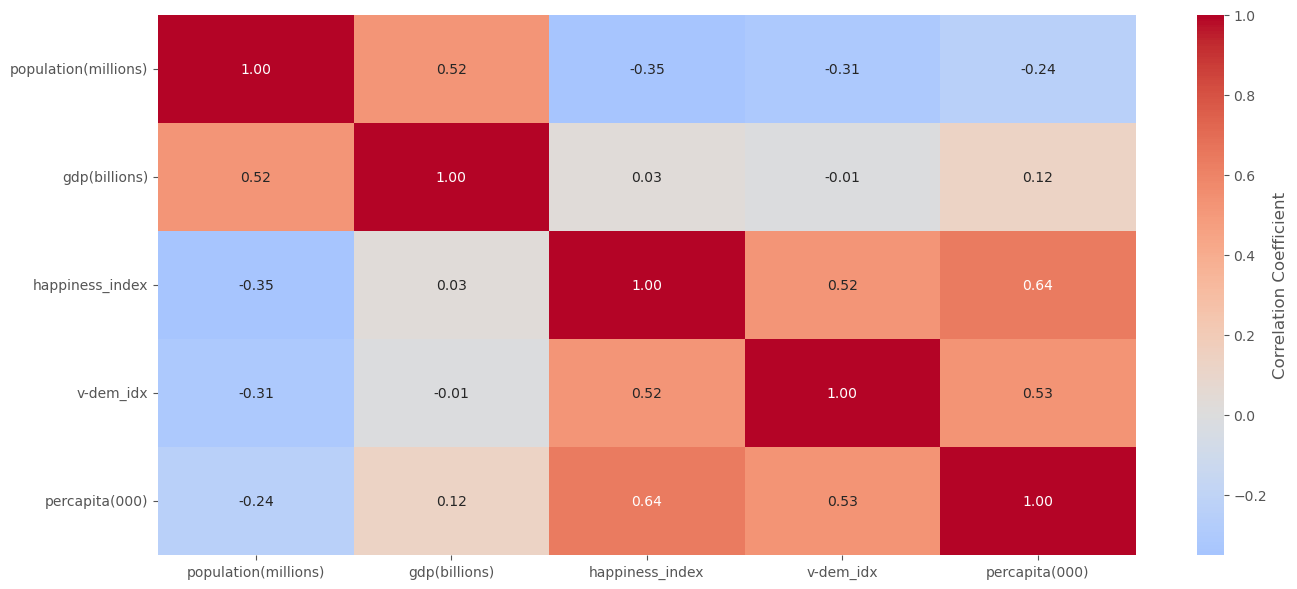

In [3]:
numeric_columns = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14,6))
sns.heatmap(numeric_columns.corr(),annot=True, cmap='coolwarm', center=0,fmt='.2f',
            cbar_kws={'label': 'Correlation Coefficient'})
plt.tight_layout()
plt.show()

In [4]:
formula = 'Q("percapita(000)")~Q("gdp(billions)")+Q("happiness_index")+Q("v-dem_idx")'
reg = smf.ols(formula, data = df).fit()
print(f"===== Regression Result:\n")
print(reg.summary())

===== Regression Result:

                             OLS Regression Results                            
Dep. Variable:     Q("percapita(000)")   R-squared:                       0.474
Model:                             OLS   Adj. R-squared:                  0.442
Method:                  Least Squares   F-statistic:                     14.44
Date:                 Wed, 19 Nov 2025   Prob (F-statistic):           7.81e-07
Time:                         23:01:41   Log-Likelihood:                -240.90
No. Observations:                   52   AIC:                             489.8
Df Residuals:                       48   BIC:                             497.6
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [5]:
# Multicollinearity chck with Vif
X = df[['gdp(billions)', 'happiness_index', 'v-dem_idx']]
vif_data = pd.DataFrame({
  'Variables': X.columns,
  'VIF values': [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
})
print(f"VIR Results:\n")
print(vif_data)

VIR Results:

         Variables  VIF values
0    gdp(billions)    1.177667
1  happiness_index    6.290683
2        v-dem_idx    6.049627


In [6]:
# Prediction start now
X = df[['gdp(billions)', 'happiness_index', 'v-dem_idx']]
y = df['percapita(000)']
# fit the model
model = LinearRegression()
model.fit(X,y)
# make prediction
y_pred = model.predict(X)
# display the prediction
evaluate_df = pd.DataFrame({
  'country': df['name'].str.title(),
  'Actual': y,
  'Predicted': y_pred,
  'Error(%)': (y - y_pred/y)
})
all = evaluate_df.sort_values('Actual')
display(round(all,2))

,country,Actual,Predicted,Error(%)
47,Malawi,0.51,-32.23,63.26
49,Gambia,0.96,-2.46,3.52
45,Nepal,1.54,18.39,-10.38
48,Ghana,2.36,-4.63,4.32
50,Nigeria,2.46,3.62,0.99
46,Bangladesh,2.70,2.14,1.91
4,India,2.85,-10.90,6.68
44,Vietnam,4.67,25.61,-0.82
16,Indonesia,5.07,18.16,1.49
40,Elsalvador,5.78,26.21,1.25


In [7]:
# validate the prediction
r2 = r2_score(y, y_pred)
print(f"R-Squared: {r2:.3f}")
actual_mean = y.mean()
print(f"Actual Mean percapita(all 52 countries): ${actual_mean:.2f} thousands")
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.3f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
rmse_pct = (rmse/actual_mean)*100
print(f"RMSE (%): {rmse_pct:.2f}")
mae = mean_absolute_error(y,y_pred)
print(f"Mean Absolute Error: {mae:.3f}")

R-Squared: 0.474
Actual Mean percapita(all 52 countries): $39.43 thousands
Mean Squared Error: 618.703
Root Mean Squared Error (RMSE): 24.874
RMSE (%): 63.09
Mean Absolute Error: 17.804


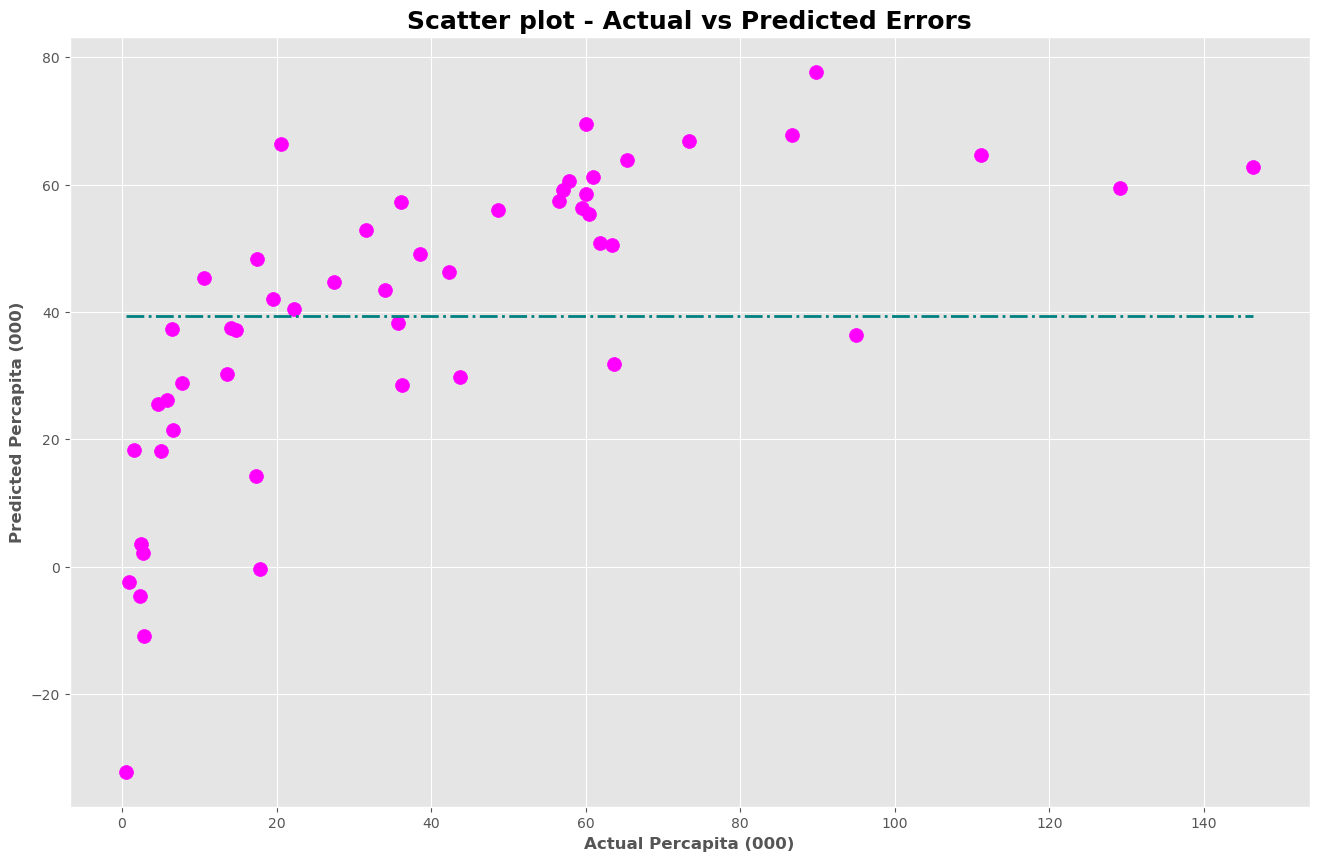

In [8]:
# visualize the prediction errors
plt.figure(figsize=(16,10))
plt.scatter(x=y, y=y_pred, s=100,color='magenta')
plt.title("Scatter plot - Actual vs Predicted Errors", fontsize=18, fontweight='bold')
plt.hlines(actual_mean, xmin=y.min(), xmax=y.max(),linestyle='-.',lw=2, color='teal')
plt.xlabel('Actual Percapita (000)', fontweight='bold')
plt.ylabel('Predicted Percapita (000)', fontweight='bold')
plt.show()